# <font color="#8C2336">Big Data Machine Learning Classification with Spark

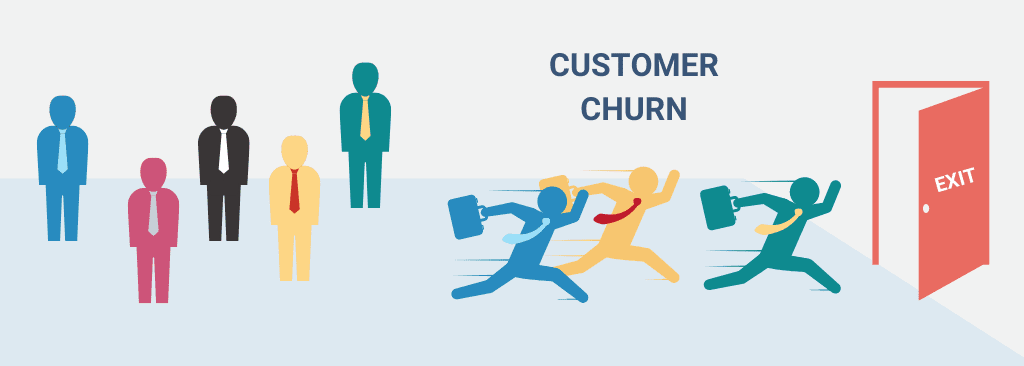

## Introduction

In this project, the goal is to predict customer churn using machine learning models implemented in **Apache Spark**. Customer churn prediction is crucial for businesses to identify at-risk customers and take proactive measures to retain them. The dataset used contains various features related to customer demographics and behaviors, with the target variable being **Churn** (indicating whether a customer has churned).

The project is structured as follows:
1. **Requirements**: Details the tools, libraries, and environment setup required to execute the project.
2. **Import Data**: Covers the process of loading and preparing the dataset in Spark.
3. **EDA (Exploratory Data Analysis)**: Analyzes the dataset to understand feature distributions, identify patterns, and address missing or inconsistent data.
4. **Modelling**: Implements and trains two machine learning models:
   - **Logistic Regression**: A linear model well-suited for binary classification tasks.
   - **GBTClassifier**: An ensemble-based model that captures non-linear relationships in the data.
5. **Result**: Compares the performance of the models based on their accuracy and effectiveness in predicting churn.
  - **Conclusion**: Summarizes the findings and identifies the model best suited for churn prediction.



## <font color="#8C2336">Requirements

In [51]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import GBTClassifier

from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import col, sum, when

## <font color="#8C2336">Import Data

In [52]:
spark=SparkSession.builder.appName("Churn Customer Classifier").getOrCreate()

In [53]:
data=spark.read.csv("churn.csv",header=True,inferSchema=True)

## <font color="#8C2336">EDA (Exploratory Data Analysis)

In [54]:
data

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [55]:
data.head(5)

[Row(_c0=0, Names='Cameron Williams', Age=42.0, Total_Purchase=11066.8, Account_Manager=0, Years=7.22, Num_Sites=8.0, Churn=1),
 Row(_c0=1, Names='Kevin Mueller', Age=41.0, Total_Purchase=11916.22, Account_Manager=0, Years=6.5, Num_Sites=11.0, Churn=1),
 Row(_c0=2, Names='Eric Lozano', Age=38.0, Total_Purchase=12884.75, Account_Manager=0, Years=6.67, Num_Sites=12.0, Churn=1),
 Row(_c0=3, Names='Phillip White', Age=42.0, Total_Purchase=8010.76, Account_Manager=0, Years=6.71, Num_Sites=10.0, Churn=1),
 Row(_c0=4, Names='Cynthia Norton', Age=37.0, Total_Purchase=9191.58, Account_Manager=0, Years=5.56, Num_Sites=9.0, Churn=1)]

In [56]:
predictors=["Age","Total_Purchase","Account_Manager","Years","Num_Sites"]
predictors

['Age', 'Total_Purchase', 'Account_Manager', 'Years', 'Num_Sites']

In [57]:
null_counts=data.select([
    sum(when(col(c).isNull(), 1).otherwise(0)).alias(c)
    for c in data.columns
])

null_counts.show()

+---+-----+---+--------------+---------------+-----+---------+-----+
|_c0|Names|Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+-----+---+--------------+---------------+-----+---------+-----+
|  0|    0|  0|             0|              0|    0|        0|    0|
+---+-----+---+--------------+---------------+-----+---------+-----+



In [58]:
churn_ratings=data.groupBy("Churn").count()
sorted_churn_ratings=churn_ratings.orderBy("Churn")
sorted_churn_ratings.show()

+-----+-----+
|Churn|count|
+-----+-----+
|    0|  750|
|    1|  150|
+-----+-----+



## <font color="#8C2336">Modelling

In [59]:
assembler=VectorAssembler(inputCols=predictors, outputCol='Output')

In [60]:
data=assembler.transform(data).select('Output','Churn')

In [61]:
train_data,test_data=data.randomSplit([.7,.3],seed=42)

### <font color="#8C2336">Train Model with Logistic Regression

In [62]:
lr=LogisticRegression(labelCol="Churn",featuresCol="Output")
model=lr.fit(train_data)
predictions=model.transform(test_data)

In [63]:
evaluator=BinaryClassificationEvaluator(labelCol="Churn")
accuracy=evaluator.evaluate(predictions)
print("Accuracy:",accuracy)

Accuracy: 0.9232723577235776


### <font color="#8C2336">Train Model with GBTClassifier

In [64]:
gc=GBTClassifier(labelCol="Churn",featuresCol="Output")
model=gc.fit(train_data)
predictions=model.transform(test_data)

In [66]:
evaluator=BinaryClassificationEvaluator(labelCol="Churn")
accuracy=evaluator.evaluate(predictions)
print("Accuracy:",accuracy)

Accuracy: 0.8431148373983745


In [36]:
spark.stop()

## <font color="#8C2336">Results

In this project, the primary goal was to predict customer churn using machine learning models. Two models were trained and evaluated for this purpose:

1. **Logistic Regression**:  
   The Logistic Regression model achieved an accuracy of **92.33%**, demonstrating strong performance in predicting customer churn. This result indicates that the model effectively separates customers likely to churn from those who are not.

2. **Gradient-Boosted Tree Classifier (GBTClassifier)**:  
   The GBTClassifier achieved an accuracy of **84.31%**, which is lower than the Logistic Regression model. While this model is generally more robust to non-linear patterns in the data, it underperformed in this specific context.

### <font color="#8C2336">Conclusion
The Logistic Regression model outperformed the Gradient-Boosted Tree Classifier in terms of accuracy. Therefore, the Logistic Regression model is recommended for predicting customer churn in this dataset. Its higher accuracy makes it a more reliable choice for identifying at-risk customers.